<a href="https://colab.research.google.com/github/thecodelearner/python/blob/master/Stock_Market_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [70]:
dataset = pd.read_csv('/axis_train.csv',index_col="Date",parse_dates=True)

In [55]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-04-01,199.800003,199.800003,197.600006,198.610001,658270.0
2010-05-01,200.199997,203.770004,199.399994,202.000000,1105750.0
2010-06-01,203.330002,204.000000,198.429993,199.059998,815055.0
2010-07-01,200.000000,201.000000,197.800003,200.589996,1123435.0
2010-08-01,201.800003,203.660004,199.399994,202.710007,1219710.0


In [72]:
dataset.isna().any()

Open      True
High      True
Low       True
Close     True
Volume    True
dtype: bool

In [73]:
# Data before cleaning null values.
# 2591 entries.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2591 entries, 2010-04-01 to 2020-06-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2583 non-null   float64
 1   High    2583 non-null   float64
 2   Low     2583 non-null   float64
 3   Close   2583 non-null   float64
 4   Volume  2583 non-null   float64
dtypes: float64(5)
memory usage: 121.5 KB


In [74]:
# drop na (null) valued rows from dataset.
dataset = dataset.dropna()

In [67]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [75]:
# Data after cleaning null values.
# 2583 entries.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2583 entries, 2010-04-01 to 2020-06-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2583 non-null   float64
 1   High    2583 non-null   float64
 2   Low     2583 non-null   float64
 3   Close   2583 non-null   float64
 4   Volume  2583 non-null   float64
dtypes: float64(5)
memory usage: 121.1 KB


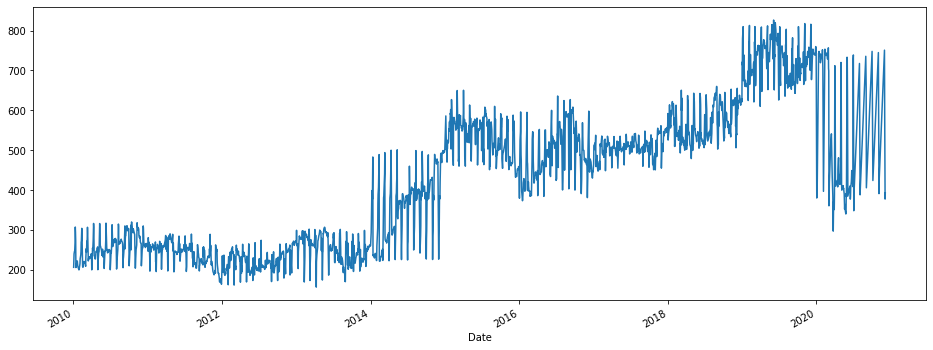

In [76]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)

In [ ]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [78]:
# 7 day rolling mean
dataset.rolling(7).mean().head(14)

,Open,High,Low,Close,Volume
Date,,,,,
2010-04-01,NaN,NaN,NaN,NaN,NaN
2010-05-01,NaN,NaN,NaN,NaN,NaN
2010-06-01,NaN,NaN,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN,NaN,NaN
2010-08-01,NaN,NaN,NaN,NaN,NaN
2010-11-01,NaN,NaN,NaN,NaN,NaN
2010-12-01,202.732858,205.432859,200.357143,203.287144,1.145430e+06
2010-01-13,203.561430,206.832860,201.500000,204.612858,1.369241e+06
2010-01-14,204.644287,208.517144,202.697144,206.100002,1.529604e+06


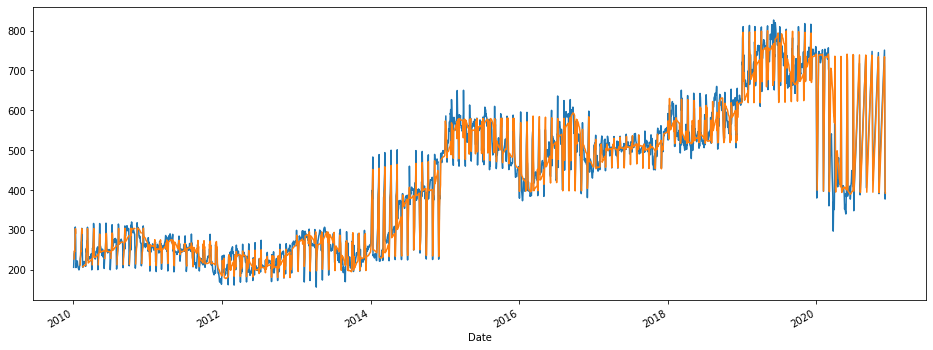

In [79]:
dataset['Open'].plot(figsize=(16,6))
# orange - 30 day rolling mean.
# blue - original stock price.
dataset.rolling(window=30).mean()['Close'].plot()

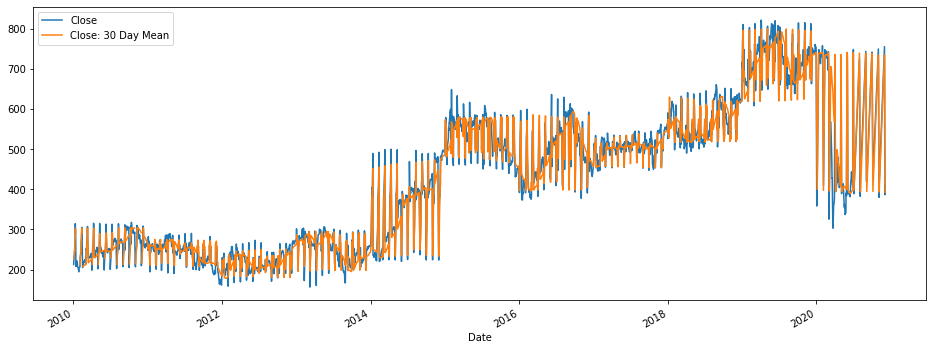

In [80]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [ ]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [82]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [83]:
# Feature Scaling using scikit learn
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [84]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [85]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [86]:
# Initialising the RNN
regressor = Sequential()

In [87]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [88]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0067
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0018
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0011
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0011
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 9.2109e-04
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step 

In [89]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/axis_test.csv',index_col="Date", parse_dates=True)

In [90]:
real_stock_price = dataset_test.iloc[:, 1:2].values
# print(real_stock_price)

In [91]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-04-01,199.800003,199.800003,197.600006,198.610001,658270.0
2010-05-01,200.199997,203.770004,199.399994,202.000000,1105750.0
2010-06-01,203.330002,204.000000,198.429993,199.059998,815055.0
2010-07-01,200.000000,201.000000,197.800003,200.589996,1123435.0
2010-08-01,201.800003,203.660004,199.399994,202.710007,1219710.0


In [92]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2591 entries, 2010-04-01 to NaT
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     float64
dtypes: float64(5)
memory usage: 121.5 KB


In [ ]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [93]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [94]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2591 entries, 2010-04-01 to NaT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 40.5 KB


In [95]:
# Getting the predicted stock price of 2020
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [96]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.head(20)

,0
0,393.634644
1,320.556549
2,242.419113
3,200.289001
4,193.516235
5,203.845047
6,215.764542
7,224.074738
8,225.016586
9,222.280579


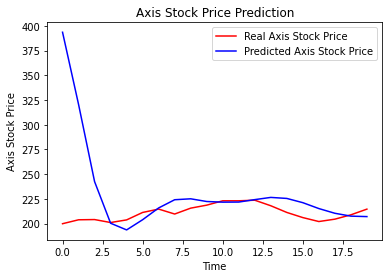

In [97]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Axis Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Axis Stock Price')
plt.title('Axis Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Axis Stock Price')
plt.legend()
plt.show()